<a href="https://colab.research.google.com/github/Musembi001/My-Projects/blob/main/Deep_Learning_RNN_GRUs_LSTM_Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install keras nltk numpy


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg

# Load Shakespeare's Hamlet
hamlet = gutenberg.words('shakespeare-hamlet.txt')

# Convert to a single string of text
text = ' '.join(hamlet).lower()

print("Text length:", len(text))
print("Sample text:", text[:500])


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Text length: 166764
Sample text: [ the tragedie of hamlet by william shakespeare 1599 ] actus primus . scoena prima . enter barnardo and francisco two centinels . barnardo . who ' s there ? fran . nay answer me : stand & vnfold your selfe bar . long liue the king fran . barnardo ? bar . he fran . you come most carefully vpon your houre bar . ' tis now strook twelue , get thee to bed francisco fran . for this releefe much thankes : ' tis bitter cold , and i am sicke at heart barn . haue you had quiet guard ? fran . not a mouse s


In [4]:
# preprocessing
import numpy as np

# Create a dictionary of unique characters
chars = sorted(set(text))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

# Define sequence length and stride
seq_length = 40  # Each input sequence will have 40 characters
stride = 3       # Step size

# Generate sequences
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, stride):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

print(f"Total sequences: {len(sequences)}")


Total sequences: 55575


In [5]:
# Convert sequences into numerical format
X = np.zeros((len(sequences), seq_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sequences), len(chars)), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1


In [7]:
#Building a simple RNN model
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Activation

# Create the RNN model
model = Sequential([
    SimpleRNN(128, input_shape=(seq_length, len(chars))),
    Dense(len(chars)),
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 43)                  │           5,547 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 43)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,563 (107.67 KB)

 Trainable params: 27,563 (107.67 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Training the Model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("rnn_text_gen.h5", monitor='loss', save_best_only=True)

model.fit(X, y, batch_size=128, epochs=20, callbacks=[checkpoint])


Epoch 1/20
432/435 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.8167

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 2.8143
Epoch 2/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.1928

435/435 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 2.1927
Epoch 3/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.0734

435/435 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 2.0733
Epoch 4/20
433/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.0146

435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 2.0145
Epoch 5/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.9467

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.9467
Epoch 6/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.9105

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.9105
Epoch 7/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.8847

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.8847
Epoch 8/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.8485

435/435 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 1.8486
Epoch 9/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.8270

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 1.8270
Epoch 10/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.7939

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 1.7939
Epoch 11/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.7677

435/435 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 1.7677
Epoch 12/20
433/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.7563

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.7563
Epoch 13/20
433/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.7230

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.7230
Epoch 14/20
432/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.7061

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.7061
Epoch 15/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.6875

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.6876
Epoch 16/20
433/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.6576

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.6577
Epoch 17/20
433/435 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.6564

435/435 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 1.6564
Epoch 18/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.6374

435/435 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 1.6374
Epoch 19/20
433/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.6149

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.6150
Epoch 20/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.6006

435/435 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.6006


In [9]:
#generate text
import random

# Function to generate text
def generate_text(seed_text, length=200):
    generated = seed_text
    for _ in range(length):
        x_pred = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(seed_text):
            x_pred[0, t, char_to_idx[char]] = 1

        predictions = model.predict(x_pred, verbose=0)[0]
        next_char = idx_to_char[np.argmax(predictions)]

        generated += next_char
        seed_text = seed_text[1:] + next_char  # Shift input

    return generated

# Try generating text
start_index = random.randint(0, len(text) - seq_length - 1)
seed = text[start_index:start_index + seq_length]
print(generate_text(seed))


n , fetch me a stoupe of liquor . sings , the manter , the mande dis , the manter , the mande dis , the manter , the mande dis , the manter , the mande dis , the manter , the mande dis , the manter , the mande dis , the manter , the mande d


In [10]:
#To improve performance, we replace SimpleRNN with GRU
from keras.layers import GRU

# Create a GRU-based model
model_gru = Sequential([
    GRU(128, input_shape=(seq_length, len(chars))),
    Dense(len(chars)),
    Activation('softmax')
])

model_gru.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the GRU model
model_gru.fit(X, y, batch_size=128, epochs=20, callbacks=[checkpoint])


Epoch 1/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 34s 74ms/step - loss: 2.8352
Epoch 2/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - loss: 2.1432
Epoch 3/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 2.0237
Epoch 4/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - loss: 1.9222
Epoch 5/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - loss: 1.8329
Epoch 6/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 43s 76ms/step - loss: 1.7721
Epoch 7/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 38s 70ms/step - loss: 1.7138
Epoch 8/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - loss: 1.6723
Epoch 9/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - loss: 1.6323
Epoch 10/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.5941

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - loss: 1.5941
Epoch 11/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.5698

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - loss: 1.5697
Epoch 12/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.5195

435/435 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 1.5196
Epoch 13/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.4887

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - loss: 1.4887
Epoch 14/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.4718

435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - loss: 1.4718
Epoch 15/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.4313

435/435 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 1.4314
Epoch 16/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.4053

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - loss: 1.4054
Epoch 17/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.3848

435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - loss: 1.3848
Epoch 18/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.3477

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 1.3478
Epoch 19/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.3404

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - loss: 1.3404
Epoch 20/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.2938

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 1.2939


In [11]:
#generate text using the GRU
import random

# Function to generate text
def generate_text(seed_text, length=200):
    generated = seed_text
    for _ in range(length):
        x_pred = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(seed_text):
            x_pred[0, t, char_to_idx[char]] = 1

        predictions = model.predict(x_pred, verbose=0)[0]
        next_char = idx_to_char[np.argmax(predictions)]

        generated += next_char
        seed_text = seed_text[1:] + next_char  # Shift input

    return generated

# Try generating text
start_index = random.randint(0, len(text) - seq_length - 1)
seed = text[start_index:start_index + seq_length]
print(generate_text(seed))


 giue me my father qu . calmely good laer . more the made the madne ser , the manter , the mande dis , the manter , the mande dis , the manter , the mande dis , the manter , the mande dis , the manter , the mande dis , the manter , the mand


In [15]:
#Long Short-Term Memory (LSTM) networks as discussed in Chapter 6 of Hands-On Neural Networks with Keras.
#Install dependencies:
!pip install keras numpy pandas scikit-learn matplotlib
!pip install yfinance


In [16]:
import yfinance as yf

# Fetch stock data for Apple (AAPL)
df = yf.download("AAPL", start="2010-01-01", end="2024-01-01")

# Keep only 'Close' price
df = df[['Close']]
df.reset_index(inplace=True)

# Display the first few rows
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,AAPL
0,2010-01-04,6.440331
1,2010-01-05,6.451466
2,2010-01-06,6.348846
3,2010-01-07,6.337110
4,2010-01-08,6.379240


In [19]:
#Preprocessing
#Normalize and Split Data
#We normalize the stock prices between 0 and 1.
scaler = MinMaxScaler(feature_range=(0,1))
df['Close'] = scaler.fit_transform(df[['Close']])

# Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]


[*********************100%***********************]  1 of 1 completed


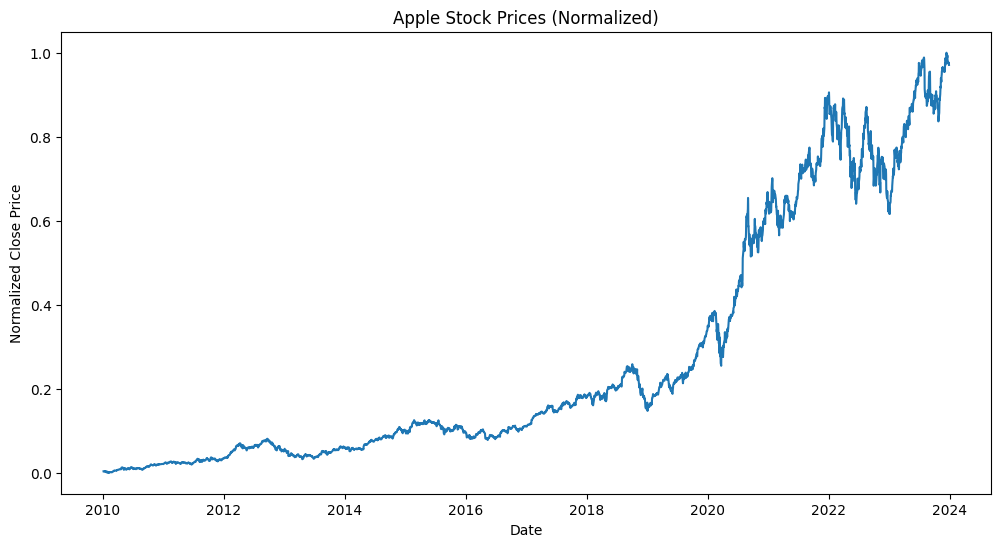

In [23]:
#Load & Preprocess Data
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Download AAPL stock data from Yahoo Finance
df = yf.download("AAPL", start="2010-01-01", end="2024-01-01")[['Close']]
df.reset_index(inplace=True)

# Normalize 'Close' prices between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

# Plot data
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title("Apple Stock Prices (Normalized)")
plt.xlabel("Date")
plt.ylabel("Normalized Close Price")
plt.show()


In [25]:
#Create Sequences for LSTM
def create_sequences(data, look_back=50):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data.iloc[i:i+look_back]['Close'].values)  # Only 'Close' column
        Y.append(data.iloc[i+look_back]['Close'])
    return np.array(X), np.array(Y)

# Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Generate sequences
look_back = 50  # Use last 50 days to predict next day
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Reshape for LSTM input (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Data Ready - X_train shape:", X_train.shape, "y_train shape:", y_train.shape)


Data Ready - X_train shape: (2767, 50, 1) y_train shape: (2767, 1)


In [35]:
#Before creating sequences, make sure the Close column is numeric
print(type(df))  # Ensure it's a DataFrame
print(df.dtypes)  # Check column types

import pandas as pd

# Print DataFrame structure before modification
print("Before modification:")
print(type(df))  # Ensure it's a DataFrame
print(df.dtypes)  # Check column types

# Ensure 'Close' is correctly selected
df = df.copy()  # Avoid modifying a slice
df = df[['Close']]  # Select only the 'Close' column

# Convert 'Close' to numeric type
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop any NaN values
df.dropna(inplace=True)

# Print DataFrame structure after modification
print("\nAfter modification:")
print(df.head())  # Check first few rows
print(df.dtypes)  # Ensure 'Close' is float64



<class 'pandas.core.frame.DataFrame'>
Ticker
Close    float64
dtype: object
Before modification:
<class 'pandas.core.frame.DataFrame'>
Ticker
Close    float64
dtype: object

After modification:
Ticker     Close
0       0.003457
1       0.003516
2       0.002979
3       0.002917
4       0.003138
Ticker
Close    float64
dtype: object


In [33]:
print(df.head())  # Verify structure
print(df.dtypes)  # Ensure 'Close' is float64


Ticker     Close
0       0.003457
1       0.003516
2       0.002979
3       0.002917
4       0.003138
Ticker
Close    float64
dtype: object


In [36]:
# Split into training (80%) and testing (20%)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

print(f"Training Data: {train_data.shape}, Testing Data: {test_data.shape}")


Training Data: (2817, 1), Testing Data: (705, 1)


In [38]:
#Create Sequences for LSTM
import numpy as np

def create_sequences(data, look_back=50):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data.iloc[i:i+look_back]['Close'].values)  # Select only 'Close'
        Y.append(data.iloc[i+look_back]['Close'])  # Target is next day price
    return np.array(X), np.array(Y)

# Generate sequences
look_back = 50
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Reshape for LSTM (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Data Ready - X_train shape:", X_train.shape, "y_train shape:", y_train.shape)


Data Ready - X_train shape: (2767, 50, 1) y_train shape: (2767,)


In [39]:
#Build & Train LSTM Model
#We define an LSTM model with two LSTM layers and a Dense output layer.
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),  # First LSTM layer
    Dropout(0.2),
    LSTM(50),  # Second LSTM layer
    Dense(1)  # Output layer for prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0068 - val_loss: 9.7325e-04
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 1.6713e-04 - val_loss: 0.0014
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.5574e-04 - val_loss: 0.0016
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.7255e-04 - val_loss: 0.0012
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 1.6663e-04 - val_loss: 0.0036
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 1.6868e-04 - val_loss: 0.0019
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.5916e-04 - val_loss: 0.0026
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.4463e-04 - val_loss: 8.5426e-04
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 1.6246e-04 - val_loss: 0.0011
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.4659e-04 - val_loss: 0.0017
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.1876e-04 - val_loss: 8.6502e-04
Epoch 12/20
87/87 ━━━━

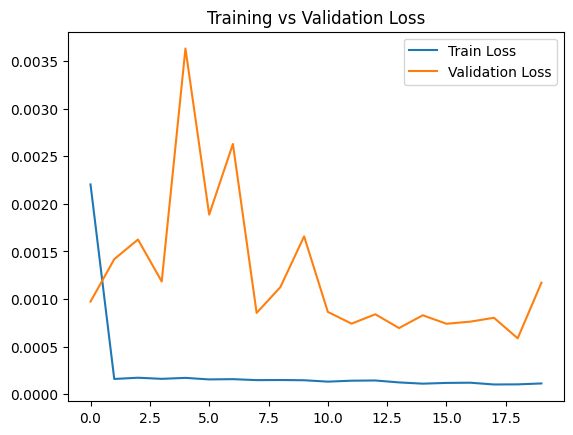

In [40]:
#Evaluate & Predict
#Plot Training Loss

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


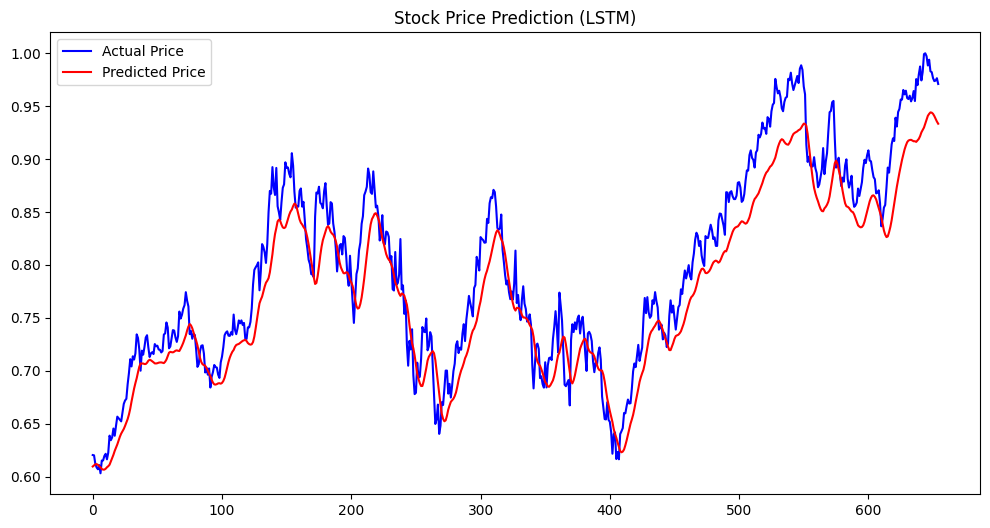

In [41]:
#Now lets make predictions
# Predict stock prices
predictions = model.predict(X_test)

# Inverse transform predictions (if data was normalized)
predictions = predictions.reshape(-1, 1)  # Ensure correct shape

# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual Price", color='blue')
plt.plot(predictions, label="Predicted Price", color='red')
plt.legend()
plt.title("Stock Price Prediction (LSTM)")
plt.show()
